In [1]:
import matplotlib.pyplot as plt
import rebound
import numpy as np
%matplotlib inline
plt.style.use('paper')

In [2]:
def setup(mu=1e-15, j=1000, k=1, etilde=0.1, phi=0.1, Ndeltat=10):
    n = 2*np.pi
    n20 = n*(j-k)/j
    
    ec = 2*k/3/j
    e = etilde*ec
    deltat = 2/3/n20 # time to move delta a in y at a rate delta v
    pomega = np.pi/2
    
    sim = rebound.Simulation()
    sim.t = -Ndeltat*deltat
    
    sim.G = 4*np.pi**2
    sim.add(m=1)
    sim.add(m=mu, P=1, theta=pomega+phi+n*sim.t) # # phi = l - pomega, so l = pomega+phi
    sim.add(P=2*np.pi/n20, e=e, pomega=pomega, theta=pomega+phi+n20*sim.t) # use f instead of lambda to be exact loc
    ps = sim.particles

    
    return sim

In [3]:
def run(mu=1e-15, j=1000, k=1, etilde=0.1, phi=0.1, Ndeltat=10):
    sim = setup(mu, j, k, etilde, phi, Ndeltat)
    ps = sim.particles

    n = 2*np.pi
    n20 = n*(j-k)/j
    deltat = 2/3/n20 # time to move delta a in y at a rate delta v
    sim.integrate(Ndeltat*deltat)
    
    return (ps[2].n-n20)/n20

In [4]:
%%time
mu=3e-8
etildes = np.logspace(-3, -0.2, 100)
delta = [run(mu=mu, j=11, etilde=etilde) for etilde in etildes]

CPU times: user 43.6 ms, sys: 810 µs, total: 44.4 ms
Wall time: 43.9 ms


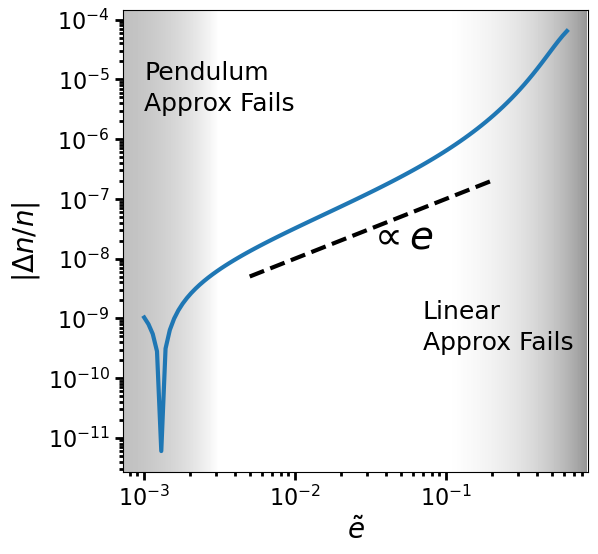

In [5]:
fig, ax = plt.subplots()
ax.loglog(etildes, np.abs(delta))
ax.loglog(np.linspace(5e-3, 0.2, 100), 1e-6*np.linspace(5e-3, 0.2, 100), linestyle='--', color='k')
ax.text(0.03, 1.5e-8, r'$\propto e$', fontsize=28)
ax.set_xlabel(r'$\tilde{e}$')
ax.set_ylabel(r'$|\Delta n/n$|')
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# do gradients
x = np.linspace(0.1, xlim[1]+0.3, 200)
polygon = ax.fill_between(x, 1e-12*np.ones(200), 1e-3*np.ones(200), lw=0, color='none')
verts = np.vstack([p.vertices for p in polygon.get_paths()])
gradient = ax.imshow(np.linspace(0, 1, 256).reshape(1, -1), cmap='gray_r', aspect='auto',
                      extent=[verts[:, 0].min(), verts[:, 0].max(), verts[:, 1].min(), verts[:, 1].max()], vmax=1.7)
gradient.set_clip_path(polygon.get_paths()[0], transform=ax.transData)

xpend = mu**(1/3)
x = np.linspace(xlim[0], xpend, 200)
polygon = ax.fill_between(x, 1e-12*np.ones(200), 1e-3*np.ones(200), lw=0, color='none')
verts = np.vstack([p.vertices for p in polygon.get_paths()])
gradient = ax.imshow(np.linspace(0, 1, 256).reshape(1, -1), cmap='gray', aspect='auto',
                      extent=[verts[:, 0].min(), verts[:, 0].max(), verts[:, 1].min(), verts[:, 1].max()], vmin = -3)
gradient.set_clip_path(polygon.get_paths()[0], transform=ax.transData)

#ax.axvline(xpend, linestyle='-.', color='k', alpha=0.2)
ax.text(1e-3, 1e-5, 'Pendulum', fontsize=18)
ax.text(1e-3, 3e-6, 'Approx Fails', fontsize=18)
ax.text(0.07, 1e-9, 'Linear', fontsize=18)
ax.text(0.07, 3e-10, 'Approx Fails', fontsize=18)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
fig.savefig('firstorder.pdf', bbox_inches='tight')

# k=2

In [6]:
%%time
etildes = np.logspace(-2, -1, 100)
delta1 = np.array([run(mu=3e-6, j=5, k=2, etilde=etilde, phi=np.pi/2+0.5) for etilde in etildes])

CPU times: user 179 ms, sys: 1.77 ms, total: 181 ms
Wall time: 62.8 ms


In [7]:
%%time
delta2 = np.array([run(mu=3e-6, j=5, k=2, etilde=etilde, phi=3*np.pi/2+0.5) for etilde in etildes])

CPU times: user 186 ms, sys: 1.66 ms, total: 188 ms
Wall time: 62.7 ms


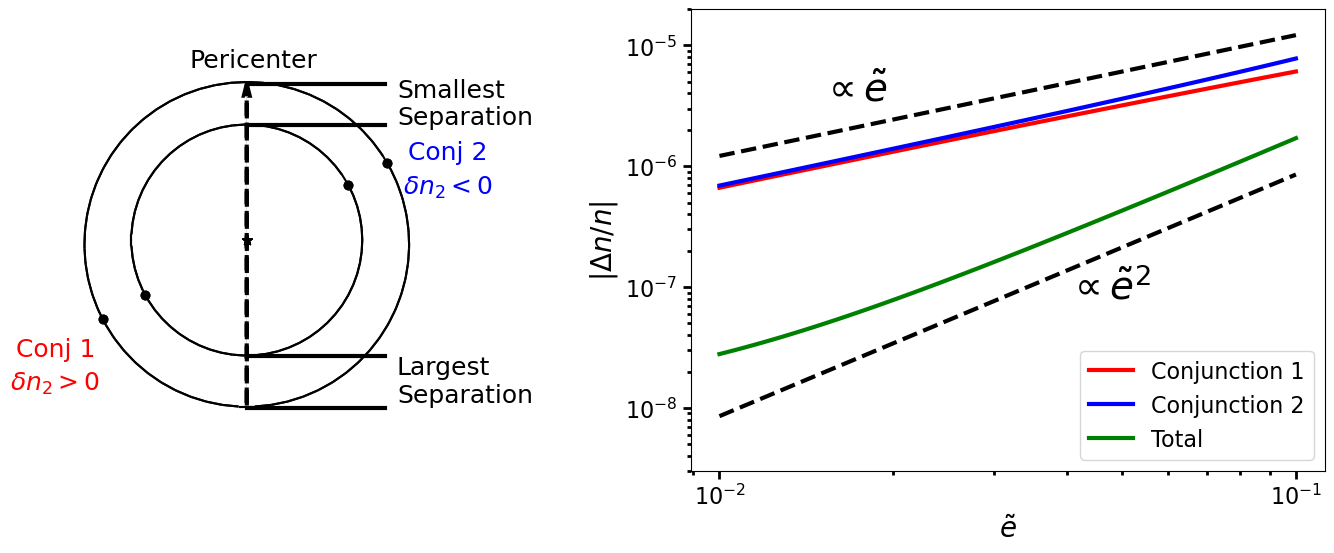

In [46]:
fig, axarr = plt.subplots(figsize=(18,6), ncols=2)

sim = setup(mu=3e-6, j=5, k=2, etilde=0.1, phi=np.pi/2+0.5, Ndeltat=0.0)
rebound.OrbitPlot(sim, fig=fig, ax=axarr[0], orbit_style='solid', lw=1.5)
sim = setup(mu=3e-6, j=5, k=2, etilde=0.1, phi=3*np.pi/2+0.5, Ndeltat=0.)
rebound.OrbitPlot(sim, fig=fig, ax=axarr[0], orbit_style='solid', lw=1.5)
axarr[0].set_xlim([-2,2])
axarr[0].set_ylim([-2,2])
axarr[0].set_aspect('equal')
axarr[0].axis('off')

axarr[0].arrow(0, -1.45, 0, 2.7, head_width=0.05, head_length=0.1, fc='k', ec='k', linestyle='dashed', lw=3)
axarr[0].text(-0.5, 1.5, 'Pericenter', fontsize=18)
axarr[0].plot([0.,1.2], [1.35, 1.35], 'k', lw=3)
axarr[0].plot([0.,1.2], [1., 1.], 'k', lw=3)
axarr[0].text(1.3, 1., 'Smallest\nSeparation', fontsize=18)
axarr[0].plot([0.,1.2], [-1., -1.], 'k', lw=3)
axarr[0].plot([0.,1.2], [-1.45, -1.45], 'k', lw=3)
axarr[0].text(1.3, -1.4, 'Largest\nSeparation', fontsize=18)
axarr[0].text(-2, -1, 'Conj 1', color='r', fontsize=18)
axarr[0].text(-2.05, -1.3, r'$\delta n_2 > 0$', color='r', fontsize=18)
axarr[0].text(1.4, 0.7, 'Conj 2', color='b', fontsize=18)
axarr[0].text(1.35, 0.4, r'$\delta n_2 < 0$', color='b', fontsize=18)


axarr[1].loglog(etildes, delta1, color='r', label='Conjunction 1')
axarr[1].loglog(etildes, np.abs(delta2), color='b', label='Conjunction 2')
axarr[1].loglog(etildes, 2*delta1[-1]*etildes/etildes[-1], color='k', linestyle='--')
axarr[1].loglog(etildes, np.abs(delta1+delta2), color='g', label='Total')
axarr[1].loglog(etildes, 0.5*np.abs(delta1+delta2)[-1]*(etildes/etildes[-1])**2, color='k', linestyle='--')
axarr[1].text(0.015, 3.5e-6, r'$\propto \tilde{e}$', fontsize=28)
axarr[1].text(0.04, 8e-8, r'$\propto \tilde{e}^2$', fontsize=28)
axarr[1].legend(loc='lower right')
axarr[1].set_xlabel(r'$\tilde{e}$')
axarr[1].set_ylabel('$|\Delta n/n|$')
axarr[1].set_ylim([3e-9, 2e-5])
fig.savefig('secondorder.pdf', bbox_inches='tight')